<a href="https://colab.research.google.com/github/umeshrawat/MachineLearning/blob/master/Unsupervised_Classification/SocialClusters/src/SocialClusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Open the code repo

!git clone https://github.com/umeshrawat/MachineLearning.git

Cloning into 'MachineLearning'...
remote: Enumerating objects: 338, done.
remote: Counting objects: 100% (338/338), done.
remote: Compressing objects: 100% (320/320), done.
remote: Total 338 (delta 54), reused 232 (delta 9), pack-reused 0
Receiving objects: 100% (338/338), 14.01 MiB | 6.51 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [2]:
root_folder_path = '/content/MachineLearning/Unsupervised_Classification/SocialClusters/Dataset/facebook_combined.txt'

In [3]:
!pip install python-igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 13.5 MB/s eta 0:00:00


In [15]:
import networkx as nx

nx_graph = nx.read_edgelist(root_folder_path, create_using = nx.Graph(), nodetype = int)

In [21]:
import pandas as pd

print(nx_graph)
# Calculate degree centrality
degree_centrality = nx.degree_centrality(nx_graph)
#print(type(degree_centrality))
degreeDataFrame = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
degreeDataFrame_sorted = degreeDataFrame.sort_values('Degree Centrality', ascending=False)
print(degreeDataFrame_sorted)

Graph with 4039 nodes and 88234 edges
      Node  Degree Centrality
107    107           0.258791
351   1684           0.196137
352   1912           0.186974
1821  3437           0.135463
0        0           0.085934
1490  2543           0.072808
2154  2347           0.072065
1373  1888           0.062902
1285  1800           0.060674
1149  1663           0.058197
2145  2266           0.057949
838   1352           0.057949
366    483           0.057207
348    348           0.056711
1215  1730           0.055968
2995  1985           0.055473
2126  1941           0.055225
3169  2233           0.054978
3106  2142           0.054730
917   1431           0.054482
685   1199           0.053739
1070  1584           0.052254
3146  2206           0.052006
1253  1768           0.051758
3445  2611           0.051263
3165  2229           0.051263
3296  2410           0.051263
1075  1589           0.050768
3157  2218           0.050768
2130  2047           0.050768
572   1086           0.050768
30

The above Dataframe represents the

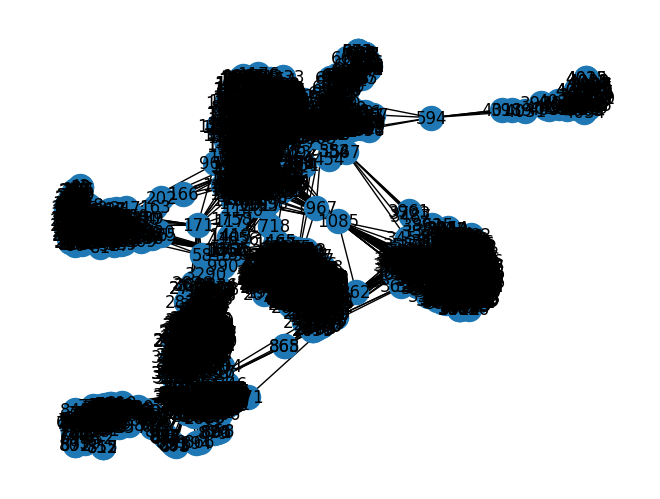

In [ ]:
import matplotlib.pyplot as plt
nx.draw(nx_graph, with_labels=True)
plt.show()